In [2]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [3]:
data = Dataset(r'C:\Users\pavan\Downloads\OCEAN\netCDF\etopo1_bedrock_global_relief_model_topography_bathymetry.nc', 'r')
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: FERRET V6.5  16-Jan-24
    Conventions: CF-1.0
    dimensions(sizes): LON13801_16801(3001), bnds(2), LAT5161_7081(1921), TIME(1)
    variables(dimensions): float64 LON13801_16801(LON13801_16801), float64 LON13801_16801_bnds(LON13801_16801, bnds), float64 LAT5161_7081(LAT5161_7081), float64 LAT5161_7081_bnds(LAT5161_7081, bnds), float64 TIME(TIME), float32 B_BATHY(TIME, LAT5161_7081, LON13801_16801)
    groups: 

In [4]:
data.variables.keys()

dict_keys(['LON13801_16801', 'LON13801_16801_bnds', 'LAT5161_7081', 'LAT5161_7081_bnds', 'TIME', 'B_BATHY'])

In [5]:
data.variables['B_BATHY']

<class 'netCDF4._netCDF4.Variable'>
float32 B_BATHY(TIME, LAT5161_7081, LON13801_16801)
    missing_value: 1e+33
    _FillValue: 1e+33
    long_name: etopo1 bedrock global relief model-topography/bathymetry (m)
    history: From etopo1_bed
unlimited dimensions: TIME
current shape = (1, 1921, 3001)
filling on

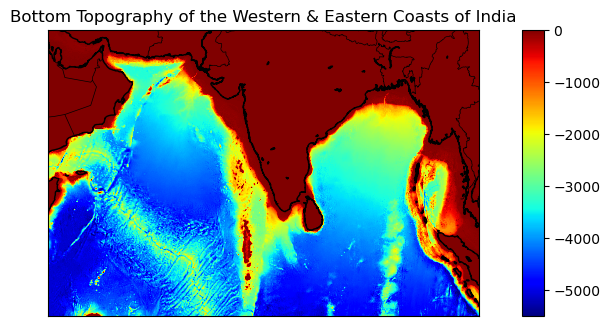

In [6]:
lats = data.variables['LAT5161_7081'][:]
lons = data.variables['LON13801_16801'][:]
bathy = data.variables['B_BATHY'][:]

mp = Basemap(projection = 'merc', 
             llcrnrlon =  50,
             llcrnrlat =   -4,
             urcrnrlon =  100,
             urcrnrlat =  28, 
             resolution = 'i')

lon, lat = np.meshgrid(lons, lats)
x,y = mp(lon, lat)
    

c_scheme = mp.pcolor(x, y, np.squeeze(bathy[0,:,:]), cmap = 'jet')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

cbar = mp.colorbar(c_scheme, location = 'right', pad = '10%')
plt.title('Bottom Topography of the Western & Eastern Coasts of India')
plt.clim(-5500, 0)
plt.savefig(r'C:\Users\pavan\Downloads\OCEAN\netCDF\Bathy.'+'jpg')
#plt.clf()
plt.show()